# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import datetime as dt
import math
%matplotlib inline
df=pd.read_csv("online_retail.csv")
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [2]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
print('The total number of customers is: {}'.format(df.CustomerID.nunique()))

The total number of customers is: 4372


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df=df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
df[df.duplicated()].count()
df[df.duplicated(keep=False)].count()

InvoiceNo      10062
StockCode      10062
Description    10062
Quantity       10062
InvoiceDate    10062
UnitPrice      10062
CustomerID     10062
Country        10062
dtype: int64

In [9]:
# Inspect two numerical attributes
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


EDA  

In [10]:
cat_df = df.groupby(["StockCode","Description"]).count().reset_index()
cat_df 

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,10002,INFLATABLE POLITICAL GLOBE,49,49,49,49,49,49
1,10080,GROOVY CACTUS INFLATABLE,21,21,21,21,21,21
2,10120,DOGGY RUBBER,30,30,30,30,30,30
3,10123C,HEARTS WRAPPING TAPE,3,3,3,3,3,3
4,10124A,SPOTS ON RED BOOKCOVER TAPE,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...
3911,D,Discount,77,77,77,77,77,77
3912,DOT,DOTCOM POSTAGE,16,16,16,16,16,16
3913,M,Manual,465,465,465,465,465,465
3914,PADS,PADS TO MATCH ALL CUSHIONS,4,4,4,4,4,4


## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

In [11]:
df.CustomerID.unique().shape

(4372,)

In [12]:
df.StockCode.nunique()

3684

In [13]:
df.Description.nunique()

3896

In [14]:
cat_df = df.groupby(["StockCode","Description"]).count().reset_index()
cat_df

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,10002,INFLATABLE POLITICAL GLOBE,49,49,49,49,49,49
1,10080,GROOVY CACTUS INFLATABLE,21,21,21,21,21,21
2,10120,DOGGY RUBBER,30,30,30,30,30,30
3,10123C,HEARTS WRAPPING TAPE,3,3,3,3,3,3
4,10124A,SPOTS ON RED BOOKCOVER TAPE,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...
3911,D,Discount,77,77,77,77,77,77
3912,DOT,DOTCOM POSTAGE,16,16,16,16,16,16
3913,M,Manual,465,465,465,465,465,465
3914,PADS,PADS TO MATCH ALL CUSHIONS,4,4,4,4,4,4


EDA

In [15]:
df.CustomerID.nunique()

4372

In [16]:
(df.CustomerID.value_counts()/sum(df.CustomerID.value_counts())*100).head(13)

17841.0    1.962249
14911.0    1.450978
14096.0    1.260480
12748.0    1.141020
14606.0    0.683825
15311.0    0.612297
14646.0    0.512500
13089.0    0.456457
13263.0    0.412213
14298.0    0.403118
15039.0    0.370672
14156.0    0.349041
18118.0    0.315612
Name: CustomerID, dtype: float64

In [17]:
(df.CustomerID.value_counts()/sum(df.CustomerID.value_counts())*100).head(13).cumsum()


17841.0    1.962249
14911.0    3.413228
14096.0    4.673708
12748.0    5.814728
14606.0    6.498553
15311.0    7.110850
14646.0    7.623350
13089.0    8.079807
13263.0    8.492020
14298.0    8.895138
15039.0    9.265809
14156.0    9.614850
18118.0    9.930462
Name: CustomerID, dtype: float64

In [18]:
cat_df.StockCode.value_counts()[cat_df.StockCode.value_counts()>1].reset_index().head(20)

,index,StockCode
0,23196,4
1,23236,4
2,23535,3
3,23244,3
4,23366,3
5,23126,3
6,22937,3
7,23131,3
8,23240,3
9,23413,3


In [19]:
df[df['StockCode'] ==cat_df.StockCode.value_counts()[cat_df.StockCode.value_counts()>1].reset_index()['index'][6]]['Description'].unique()
cat_df.StockCode.value_counts()[cat_df.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,23196,4
1,23236,4
2,23535,3
3,23244,3
4,23366,3


In [20]:
# Checking customers' dsitribution (country-wise)
table = df.groupby('Country')['CustomerID'].nunique()
table_2 = table.sort_values(ascending = False).head(10)

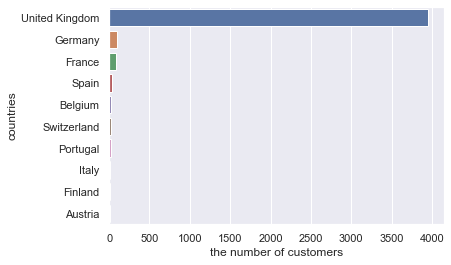

In [21]:
# Set seaborn style
sns.set(color_codes=True)

# Plot histogram
ax = sns.barplot(y= table_2.index, x=table_2.values)
ax.set(ylabel="countries")
ax.set(xlabel='the number of customers')
plt.show()

In [22]:
# Checking the top 10 countries the retailer is selling its items to, and the volumes of sales for those countries.
df.Country.value_counts().head(10)
country_counts = df.Country.value_counts().head(10)

In [23]:
# In order to see the total amount for each transaction, we add a new column named "Amount", 
df['Amount'] = df.Quantity*df.UnitPrice
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


United Kingdom
Germany
France
EIRE
Spain
Netherlands
Belgium
Switzerland
Portugal
Australia


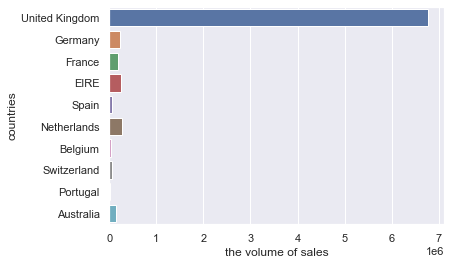

In [24]:
# Creating a loop in order to calculate the total amount sale to the top 10 countries
country_total = []
lst = []
for i in country_counts.index:
    country_total =df[df.Country ==i].Amount.sum()
    lst.append(country_total)
    print(i)

# Checking the Total Amount of sales for top countries.
country_counts = df.Country.value_counts().head(10)

# Plot histogram
ax = sns.barplot(y= country_counts.index, x=lst)
ax.set(ylabel="countries")
ax.set(xlabel="the volume of sales")
plt.show()

In [25]:
# In order to see the total amount for each transaction, we add a new column named "Amount", 
df['Amount'] = df.Quantity*df.UnitPrice
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [26]:
# We categorize the unit price in order to check company's price portfolio 
# So, we name the unit price 'low' if a number is in the interval [$0, $3], 
# 'mid' for ($3, $7], 
# 'mid_high' for ($7, $10], 
# 'high' above $10.
category = pd.cut(df['UnitPrice'], bins=[0, 3, 7, 10, 100000], include_lowest=True, labels=['low', 'mid', 'mid_high', 'high'])

In [27]:
category.value_counts(normalize = True)

low         0.723233
mid         0.184945
mid_high    0.062955
high        0.028867
Name: UnitPrice, dtype: float64

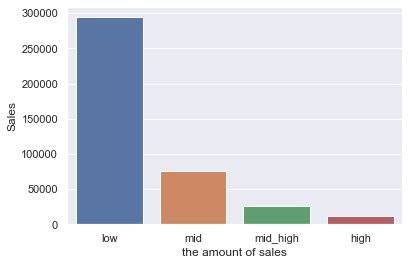

In [28]:
a= category.value_counts()
# Plot histogram
ax = sns.barplot(x= a.index, y=a.values)
ax.set(ylabel="Sales")
ax.set(xlabel="the amount of sales")
plt.show()

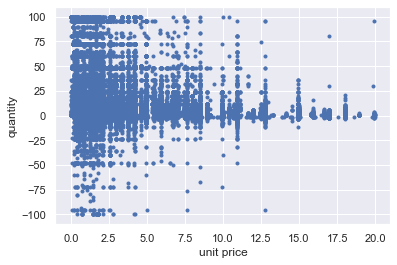

In [29]:
# Is there Correlation between unit price and quantity

df_normalized = df[(df['UnitPrice'] <= 20) & (df['Quantity'] <= 100) & (df['Quantity'] >= -100)]  
# Make a scatter plot in order to check whether there is a correlation between unit price and quantity.
plt.plot(df_normalized.UnitPrice, df_normalized.Quantity, marker='.', linestyle='none')

# Label the axes
plt.xlabel('unit price')
plt.ylabel('quantity')

# Show the result
plt.show()


In [30]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Amount         float64
dtype: object

In [31]:
# Create a function by passing a datetime object extracting year, month and day from x

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    
    return year, month, day

In [32]:
# Extract year, month and day from InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

invoice_year, invoice_month, invoice_day = get_date_int(df, 'InvoiceDate')

In [33]:
# Create an InvoiceYear, InvoiceMonth, InvoiceDay column

df['InvoiceYear']= invoice_year
df['InvoiceMonth']= invoice_month
df['InvoiceDay']= invoice_day

In [34]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1


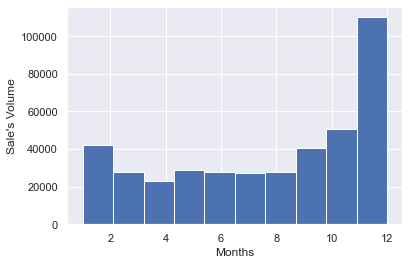

In [35]:
plt.hist(df.InvoiceMonth)
plt.xlabel('Months')
plt.ylabel("Sale's Volume")
plt.show()

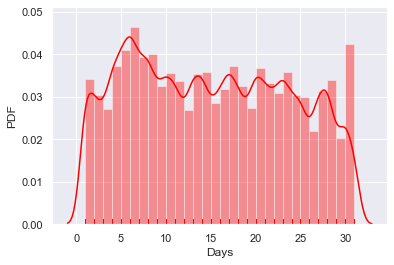

In [36]:

j = df.InvoiceDay
sns.distplot(j, rug='True', bins=30, color = 'red')
plt.xlabel('Days')
plt.ylabel('PDF')
plt.show()

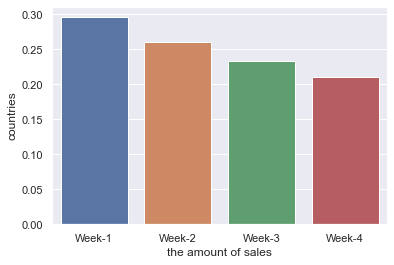

In [37]:
# Check in which weeks are there more sales.

lst3 = df.InvoiceDay.value_counts(normalize=True, sort=True, bins = 4)
lst4 = ['Week-1','Week-2','Week-3','Week-4']

# Plot histogram
ax = sns.barplot(x= lst4, y=lst3.values)
ax.set(ylabel="countries")
ax.set(xlabel="the amount of sales")
plt.show()

In [38]:
lst3

(0.969, 8.5]    0.296080
(8.5, 16.0]     0.260058
(16.0, 23.5]    0.233651
(23.5, 31.0]    0.210211
Name: InvoiceDay, dtype: float64

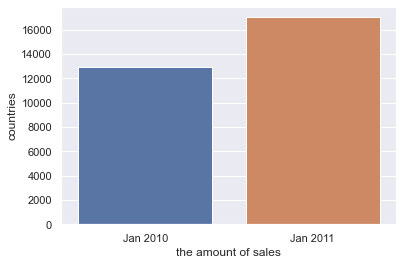

In [39]:
# Compare the overlaping period of 2011 and 2010 

sales2020 = df[(df.InvoiceYear ==2010) & (df.InvoiceMonth ==12)&(df.InvoiceDay <9)]['Quantity'].count()
sales2021 = df[(df.InvoiceYear ==2011) & (df.InvoiceMonth ==12)&(df.InvoiceDay <9)]['Quantity'].count()

lst1 = [sales2020,sales2021]
lst2 = ['Jan 2010','Jan 2011']

# Plot histogram
ax = sns.barplot(x= lst2, y=lst1)
ax.set(ylabel="countries")
ax.set(xlabel="the amount of sales")
plt.show()

In [40]:
# Check the rate of item returns

return_rate = df[df.Quantity<0].Quantity.sum() / df[df.Quantity>0].Quantity.sum()
print (f"The return rate of items: {(return_rate.round(2))}")

The return rate of items: -0.05


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   Amount        406829 non-null  float64       
 9   InvoiceYear   406829 non-null  int64         
 10  InvoiceMonth  406829 non-null  int64         
 11  InvoiceDay    406829 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 40.4+ MB


In [42]:
# Extract year, month and day from InvoiceDate
df_normalized['InvoiceDate'] = pd.to_datetime(df_normalized['InvoiceDate'])
invoice_year_2, invoice_month_2, invoice_day_2 = get_date_int(df_normalized, 'InvoiceDate')
df_normalized['InvoiceMonth_2']= invoice_month_2

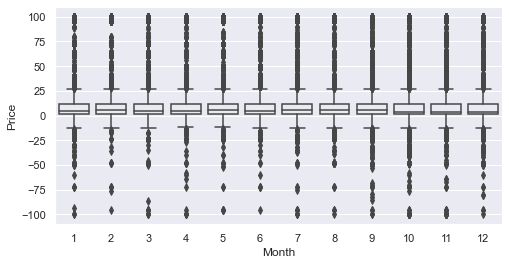

In [43]:
plt.figure(figsize = (8,4))
sns.boxplot(x='InvoiceMonth_2', y='Quantity', data=df_normalized, boxprops = {'facecolor':'None'})
#sns.swarmplot(x = 'InvoiceMonth', y = 'Amount', data = df)

# Label the axes
plt.xlabel('Month')
plt.ylabel('Price')

# Show the plot
plt.show()

Hypothesis Testing

Testing whether UK and Other countries have different mean for the average sale (Amount divided by the number of Customers).
(The null hypothesis) Ho: UK and other countries have mean difference = 0 (Ho: μ1 = μ2)

(The alternative hypothesis) Ha: UK and other countries have mean difference ≠ 0 (H1: μ1 ≠ μ2)

Z test

In [44]:
# Split the dataset into two parts (UK and non-UK)

df_UK = df[df['Country']=='United Kingdom']
df_Others = df[df['Country']!='United Kingdom']

In [45]:
# Find the total amount of sale for UK and Other Countries

df_UK['Amount'] = df_UK.Quantity*df_UK.UnitPrice
df_Others['Amount'] = df_Others.Quantity*df_Others.UnitPrice

In [46]:
# Find the total number of customers for UK and other countries

customer_counts_UK = df_UK['CustomerID'].nunique()
customer_counts_Others = df_Others['CustomerID'].nunique()


In [47]:
## Z-test statistics

# Find the average sale of customers (for UK and other countries)

UK_mean = df_UK['Amount'].sum()/customer_counts_UK
Others_mean = df_Others['Amount'].sum()/customer_counts_Others

# Find the variance for low and high capacity
UK_var = df_UK['Amount'].var()  
Others_var = df_Others['Amount'].var()

UK_ln = len(df_UK['Amount'])         
Others_ln = len(df_Others['Amount'])         

z = (UK_mean - Others_mean) / np.sqrt(UK_var/UK_ln + Others_var/Others_ln)
print ('Z-score: {}'.format(z))

Z-score: -2150.0935659473485


In [48]:
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))

p-value:2.0


In [49]:
phat = (UK_mean + Others_mean) / (UK_ln + Others_ln)
moe = 1.96 * np.sqrt(phat * (1 - phat) * (( 1/ float(UK_ln)) + (1/float(Others_ln))))
print("Margin of Error: {}".format(moe))

Margin of Error: 0.0011160256822119546


In [50]:
diff_mean = UK_mean - Others_mean
ci = diff_mean + np.array([-1, 1]) * moe
print("Confidence interval: {}".format(ci))

Confidence interval: [-1917.40317178 -1917.40093973]


Repeat the testing with equal size samples from both parts (UK and non-UK)

In [51]:
UK_sample = df_UK.sample(n = 10000)
Others_sample = df_Others.sample(n = 10000)

In [52]:
# Find the total number of customers for UK and other countries

customer_counts_UK = UK_sample['CustomerID'].nunique()
customer_counts_Others = Others_sample['CustomerID'].nunique()

In [53]:
## Z-test statistics

# Find the average sale of customers (for UK and other countries)

UK_mean = UK_sample['Amount'].sum()/customer_counts_UK
Others_mean = Others_sample['Amount'].sum()/customer_counts_Others

# Find the variance for low and high capacity
UK_var = UK_sample['Amount'].var()  
Others_var = Others_sample['Amount'].var()

UK_ln = len(UK_sample['Amount'])         
Others_ln = len(Others_sample['Amount'])         

z = (UK_mean - Others_mean) / np.sqrt(UK_var/UK_ln + Others_var/Others_ln)
print ('Z-score: {}'.format(z))

Z-score: -191.27350838665865


In [54]:
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))

p-value:2.0


Conclusion_7: P-value is greater than 0.05, so we fail to reject Null Hypoyhesis, which means that UK and Other countries' average sale aren't statistically different. (Even though UK is the major destions for most transactions)

In [55]:
#Calculate the T-test for the means of two independent samples of scores.

t, p = stats.ttest_ind(UK_sample['Amount'], Others_sample['Amount'])
print('t-statistic:', t)
print('p-value:', p)

t-statistic: -4.72980483657105
p-value: 2.262695518778944e-06


# Elements of Cohort Analysis
Pivot Table:
The cohort analysis data is typically formatted as a pivot table.

Assigned cohort in rows:
The row values represent the cohort. In our example, it is the month of the first purchase and customers are pooled into these groups based on their first ever purchase

Cohort index in columns:
The column values represent months since acquisition.

## Metrics in the table:
Here, we have the count of active customers.

In [56]:
def get_month(x): return dt.datetime(x.year, x.month,1)

In [57]:
df['InvoiceMonthWhole'] = df['InvoiceDate'].apply(get_month)

In [58]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceMonthWhole
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,2010-12-01


In [59]:
grouping = df.groupby('CustomerID')['InvoiceMonthWhole'] 


In [60]:
df['CohortMonthWhole'] = grouping.transform('min')

In [61]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceMonthWhole,CohortMonthWhole
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2010-12-01,2010-12-01
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010,12,1,2010-12-01,2010-12-01
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010,12,1,2010-12-01,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,1,2010-12-01,2010-12-01
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,1,2010-12-01,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010,12,1,2010-12-01,2010-12-01


## Step-2 Calculating the time offset
Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

We already created 3 variables (InvoiceYear, InvoiceMonth, InvoiceDay). Now, we will create 3 extra variables (CohortYear, CohortMonth, CohortDay) that capture the integer value of years, months and days for Invoice and Cohort Date by using the get_date_int() function which was created already.

In [62]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [63]:
CohortYear, CohortMonth, _=get_date_int(df, 'CohortMonthWhole')

In [64]:
# Create an CohortYear, CohortMonth column

df['CohortYear']= CohortYear
df['CohortMonth']= CohortMonth

In [65]:
years_diff = df.InvoiceYear - df.CohortYear
months_diff = df.InvoiceMonth - df.CohortMonth

In [66]:
# Calculate the number of months for the CohortIndex (12 months in a year) 
# Create a new column (CohortIndex) 

df['CohortIndex'] = years_diff * 12 + months_diff + 1 # +1 is added, as we want to start the index with 1. 
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceMonthWhole,CohortMonthWhole,CohortYear,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010,12,1,2010-12-01,2010-12-01,2010,12,1


## Step-3: Calculate the number of monthly active customers in each cohort and make the cohort counts table
Let's pull some metrics: we will calculate the number of monthly active customers in each cohort.

First, we will create a groupby object with CohortMonth and CohortIndex

In [67]:
grouping  = df.groupby(['CohortMonthWhole' , 'CohortIndex'])

In [68]:
cohort_data = grouping['CustomerID'].nunique()

In [69]:
cohort_data = cohort_data.reset_index()

In [70]:
cohort_counts = cohort_data.pivot( index= 'CohortMonthWhole',
                                   columns= 'CohortIndex',
                                   values= 'CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonthWhole,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ## Calculate Calculate Cohort Metrics (customer retention rate table and the average purchase quantity table)

Retention
Retention: It measures how many customers from each of the cohort returned in the subsequent months.

Retention Rate: The ratio of how many customers came back in the subsequent months.

In [71]:
# Store the first column as cohort_sizes

cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes

CohortMonthWhole
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    235.0
2011-07-01    191.0
2011-08-01    167.0
2011-09-01    298.0
2011-10-01    352.0
2011-11-01    321.0
2011-12-01     41.0
Name: 1, dtype: float64

In [72]:
# we will use the divide() function on the cohort_counts dataframe and pass the cohort_sizes.
# We set the axis parameter to zero to ensure that we divide along the row axis

# Divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [73]:
# Review the retention table (All numbers below shows % percent)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonthWhole,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Review the retention table (All numbers below shows % percent)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonthWhole,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we can examine our retention table. As you can see, the first column has a 100% retention rate for all cohorts, as expected. We can compare the retention rate over time and across cohorts to evaluate the health of our customer's shopping habits

Conclusion_9: Based on the retention table, we can say that Christmass (January and December) Cohort has better shopping habits. The percantage of customers coming back in subsequent months are higher than other months (maybe due to some promotions or advertisements)

In [75]:
[item.date() for item in cohort_sizes.index.tolist()]

[datetime.date(2010, 12, 1),
 datetime.date(2011, 1, 1),
 datetime.date(2011, 2, 1),
 datetime.date(2011, 3, 1),
 datetime.date(2011, 4, 1),
 datetime.date(2011, 5, 1),
 datetime.date(2011, 6, 1),
 datetime.date(2011, 7, 1),
 datetime.date(2011, 8, 1),
 datetime.date(2011, 9, 1),
 datetime.date(2011, 10, 1),
 datetime.date(2011, 11, 1),
 datetime.date(2011, 12, 1)]

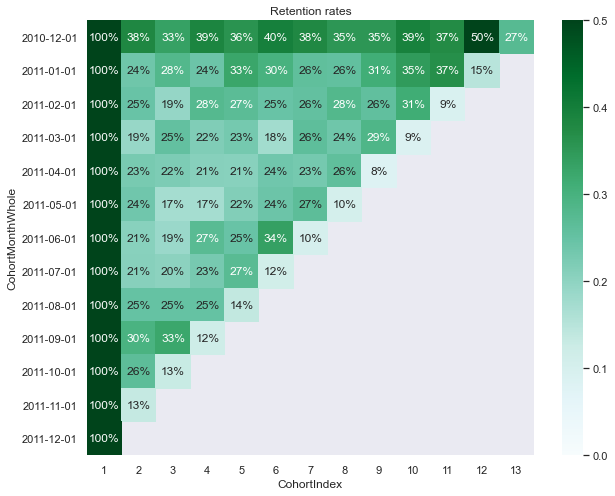

In [76]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%', yticklabels = [item.date() for item in cohort_sizes.index.tolist()] ,  vmax = 0.5,vmin = 0.0,cmap = 'BuGn') 
plt.show()

Average Quantity

In [77]:
# we create a groupby () object with CohortMonth and CohortIndex and store it as grouping.

grouping3 = df.groupby(['CohortMonthWhole', 'CohortIndex'])

In [78]:
# we call grouping object, select the Quantity column and calculate the average and we store the results as cohort_data

cohort_data = grouping3['Quantity'].mean()

In [79]:
cohort_data.head()

CohortMonthWhole  CohortIndex
2010-12-01        1              11.037691
                  2              14.603253
                  3              14.982141
                  4              14.801090
                  5              12.943024
Name: Quantity, dtype: float64

In [80]:
# we reset the index before calling the pivot function to be able to access the columns now stored as indices

cohort_data = cohort_data.reset_index()

# Finally, we create a pivot table by passing CohortMonth to the index parameter, CohortIndex to the colmuns parameter, and the Quantity to the values parameter.

average_quantity = cohort_data.pivot(index= 'CohortMonthWhole',
                                     columns='CohortIndex',
                                     values='Quantity')
# Round it up to 1 digit.

average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonthWhole,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conclusion_10: Decembers and January cohorts have higher average quantity, which means that they shop more than other cohorts.

In [81]:
# Calculate the average of the unit price 
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonthWhole', columns='CohortIndex', values='UnitPrice')

# Round it up to 1 digit.
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonthWhole,,,,,,,,,,,,,
2010-12-01,3.2,3.2,3.2,3.6,2.9,5.0,3.2,3.2,3.5,3.0,3.3,2.8,2.8
2011-01-01,3.5,3.7,3.1,8.4,3.2,3.2,2.9,2.7,2.6,5.5,2.9,2.6,NaN
2011-02-01,3.3,4.4,4.8,3.1,3.0,2.8,2.8,3.2,2.9,2.9,3.2,NaN,NaN
2011-03-01,3.3,5.0,3.7,3.3,3.6,2.8,2.8,2.8,2.7,2.5,NaN,NaN,NaN
2011-04-01,3.4,4.0,3.3,2.7,3.0,2.9,2.9,2.8,2.6,NaN,NaN,NaN,NaN
2011-05-01,4.6,3.2,2.6,3.2,2.7,2.5,2.6,2.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.4,3.2,3.3,2.8,2.6,3.5,2.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.5,3.5,2.7,2.7,2.4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.0,5.4,5.7,7.0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conclusion_11: The average price for all cohorts are between 2 and 5 dollars.

# Behavior Cohort Analysis
Behavioral customer segmentation based on identified metrics:
RFM (Recency, Frequency, Monetary Value) Segmentation

RFMT(Recency, Frequency, Monetary Value, Tenure) Segmenation

RFMTS(Recency, Frequency, Monetary Value, Tenure, Send Back) Segmenation

a. Recency (R):
**How recent was each customer's last purchase,

b. Frequency (F):
**How many purchases the customer has done in the last 12 months

c. Monetary Value (M):
** How much has the customer spent in the last 12 months.

d. Tenure (T):
** When did customer make his/her first purchase.

e. Send Back (S):
** How satisfied is the customer (High return rate (in terms of monetary value) shows higher dissatisfaction)

We will use these values to assign customers to RFM segments. Once we calculated these numbers, the next step is to group them into some sort of categorization such as high, medium and low. There are multiple ways to do that. We can break customers into groups of equal size based on;

Percentiles e.g. quantiles: percentile values of each metric.

Pareto 80/20 cut: We can assign either high or low value to each metric based on a 80/20 % Pareto split.

Custom - based on business knowledge: we can use existing knowledge from previous business insights about certain threshold values for each metric.

Now, you will assign a percentile to a metric, and then create a label to be used for segmentation.

The process of calculating percentiles is fairly simple:

First, you sort the customers based on that metric,

Then, you break the customers into a number of groups that you think is relevant. The groups are equal in size.

Finally, you assign a label to each group.

When assigning labels we want them to represent what is the top and the bottom percentile based on sorted values, but the highest value of the metric is not always the best. For example the recency metric which calculates days since the last purchase, is better when it is low rather than high.

Creating RFMT Table

In [82]:
print('Min:{}; Max:{}'.format(min(df.InvoiceDate), max(df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


Let's create a hypothetical snapshot_day data as if we're doing analysis recently

In [83]:
import datetime
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

In [84]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [85]:
# Aggregate data on a customer level

datamart= df.groupby(['CustomerID']).agg({ 
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 
    'InvoiceNo': 'count',
    'Amount': 'sum',
    'InvoiceMonthWhole': lambda x: (snapshot_date - x.min()).days})

# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate': 'Recency', 
                           'InvoiceNo': 'Frequency',
                           'Amount': 'MonetaryValue',
                           'InvoiceMonthWhole': 'Tenure'}, inplace=True)

In [86]:
datamart['MonetaryValue'] = datamart['MonetaryValue'].round(2)

In [87]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure
CustomerID,,,,
12346.0,326,2,0.00,343
12347.0,2,182,4310.00,374
12348.0,75,31,1797.24,374
12349.0,19,73,1757.55,39
12350.0,310,17,334.40,312


Our table for RFMT segmentation is completed!b

Creating Send Back Quartile

In [88]:
# Let's create a list of labels-only this time the values are reversed as lower recency is rated higher.
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels) 
datamart = datamart.assign(R = r_quartiles.values)

In [89]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R
CustomerID,,,,,
12346.0,326,2,0.00,343,1
12347.0,2,182,4310.00,374,4
12348.0,75,31,1797.24,374,2
12349.0,19,73,1757.55,39,3
12350.0,310,17,334.40,312,1


In [90]:
f_labels = range(1,5) 
m_labels = range(1,5)

f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels) 
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)

datamart = datamart.assign(F = f_quartiles.values) 
datamart = datamart.assign(M = m_quartiles.values)

In [91]:
t_labels = range(1,5) 

t_quartiles = pd.qcut(datamart['Tenure'], 4, labels = t_labels) 

datamart = datamart.assign(T = t_quartiles.values)

In [92]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T
CustomerID,,,,,,,,
12346.0,326,2,0.00,343,1,1,1,3
12347.0,2,182,4310.00,374,4,4,4,4
12348.0,75,31,1797.24,374,2,2,4,4
12349.0,19,73,1757.55,39,3,3,4,1
12350.0,310,17,334.40,312,1,1,2,3


In [93]:
s_quartiles = pd.cut(datamart['MonetaryValue'],[-np.inf,-100,-10,0,np.inf],right=False, labels = range(1,5))

datamart = datamart.assign(S = s_quartiles.values) 

Building RFM Segment and RFM Score


Concatenate RFM quartile values to RFM_Segment

Sum RFM quartiles values to RFM_Score

In [94]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M']) 
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1) 
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

In [95]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,S,RFM_Segment,RFM_Score
CustomerID,,,,,,,,,,,
12346.0,326,2,0.00,343,1,1,1,3,4,1.01.01.0,3
12347.0,2,182,4310.00,374,4,4,4,4,4,4.04.04.0,12
12348.0,75,31,1797.24,374,2,2,4,4,4,2.02.04.0,8
12349.0,19,73,1757.55,39,3,3,4,1,4,3.03.04.0,10
12350.0,310,17,334.40,312,1,1,2,3,4,1.01.02.0,4


Analyzing RFM segments

Largest RFM segments

In [96]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
4.04.04.0    471
1.01.01.0    392
1.02.02.0    209
3.04.04.0    206
2.01.01.0    181
3.03.03.0    176
2.02.02.0    173
2.03.03.0    164
4.03.03.0    156
3.02.02.0    126
dtype: int64

In [97]:
datamart[datamart['RFM_Segment']=='111'].head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,S,RFM_Segment,RFM_Score
CustomerID,,,,,,,,,,,


### Summary metrics per RFM Score

In [98]:
datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           264.8       7.8         109.1   392
4           174.5      13.9         227.1   391
5           153.0      21.2         346.8   517
6            94.3      28.5         491.8   468
7            78.8      39.7         724.2   447
8            62.7      57.0         974.7   467
9            44.2      79.0        1369.6   411
10           31.3     115.3        1894.0   440
11           20.5     193.9        3845.7   368
12            6.7     371.8        8850.7   471

### Grouping into named segments

Use RFM score to group customers into Gold, Silver and Bronze segments.

In [99]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return '1.Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return '2.Silver' 
    else:
        return '3.Bronze'

In [100]:
datamart['General_Segment'] = datamart.apply(segment_me, axis=1)

In [101]:
datamart.groupby('General_Segment').agg({ 
    'Recency': 'mean',
    'Frequency': 'mean', 
    'MonetaryValue': ['mean','sum', 'count']
}).round(1)

Recency Frequency MonetaryValue                 
                   mean      mean          mean        sum count
General_Segment                                                 
1.Gold             25.2     195.1        4130.3  6980190.8  1690
2.Silver           98.9      36.1         625.8  1188323.3  1899
3.Bronze          219.7      10.9         168.0   131551.7   783

The largest segment is our Gold customers. Their spending is almost 90% of total amount and their average spending is 7 times more than Silver Customers and 20 times more than Bronze customers. So Gold segment would be the primary target for our promotions and advertisements.

## Analyzing RFMT segments

In [102]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])+ str(x['T']) 
datamart['RFMT_Segment'] = datamart.apply(join_rfm, axis=1) 
datamart['RFMT_Score'] = datamart[['R','F','M','T']].sum(axis=1)

In [103]:
datamart.head()


,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,S,RFM_Segment,RFM_Score,General_Segment,RFMT_Segment,RFMT_Score
CustomerID,,,,,,,,,,,,,,
12346.0,326,2,0.00,343,1,1,1,3,4,1.01.01.0,3,3.Bronze,1113,6
12347.0,2,182,4310.00,374,4,4,4,4,4,4.04.04.0,12,1.Gold,4444,16
12348.0,75,31,1797.24,374,2,2,4,4,4,2.02.04.0,8,2.Silver,2244,12
12349.0,19,73,1757.55,39,3,3,4,1,4,3.03.04.0,10,1.Gold,3341,11
12350.0,310,17,334.40,312,1,1,2,3,4,1.01.02.0,4,3.Bronze,1123,7


In [104]:
#Largest RFMT Segments
datamart.groupby('RFMT_Segment').size().sort_values(ascending=False)[:10]

RFMT_Segment
4444    262
1112    214
2111    132
1222    118
3111    106
1113     98
2221     90
4442     89
4443     87
1114     80
dtype: int64

In [105]:
# Summary metrics for RFMT
datamart.groupby('RFMT_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count'],
    'Tenure': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue       Tenure      
              mean      mean          mean count   mean count
RFMT_Score                                                   
5            166.0       8.3         129.8   346  183.5   346
6            156.5      12.8         214.8   443  184.0   443
7            154.2      20.9         316.2   568  193.8   568
8            129.4      29.9         486.0   426  195.1   426
9            100.3      41.3         727.8   395  198.9   395
10            81.4      53.8         924.2   399  228.7   399
11            56.7      73.0        1265.3   390  238.9   390
12            50.3     103.7        1652.1   319  264.5   319
13            34.0     163.9        2395.5   328  292.3   328
14            23.9     180.9        3567.6   272  316.0   272
15            15.0     250.3        5127.9   224  357.9   224
16             6.5     440.2       12182.8   262  374.0   262

In [106]:
def segment_me(df):
    if df['RFMT_Score'] >= 12:
        return '1.Gold'
    elif (df['RFMT_Score'] >= 9) and (df['RFMT_Score'] < 12):
        return '2.Silver' 
    else:
        return '3.Bronze'

In [107]:
datamart['General_Segment_2'] = datamart.apply(segment_me, axis=1)

In [108]:
datamart.groupby('General_Segment').agg({ 
    'Recency': 'mean',
    'Frequency': 'mean', 
    'MonetaryValue': ['mean','sum'],
    'Tenure': ['mean', 'count']
}).round(1)

Recency Frequency MonetaryValue            Tenure      
                   mean      mean          mean        sum   mean count
General_Segment                                                        
1.Gold             25.2     195.1        4130.3  6980190.8  278.8  1690
2.Silver           98.9      36.1         625.8  1188323.3  198.2  1899
3.Bronze          219.7      10.9         168.0   131551.7  253.0   783

Conclusion_14: Quiet interestingly, the number of people (1.690) in Gold segment hasn't changed. So our primary target segment for our promotions and advertisements stays the same

## Correlation between RFM_Score and RFMT_Score

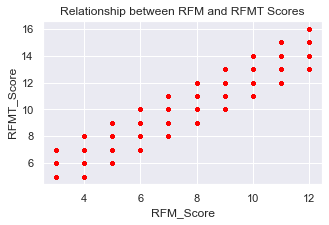

In [109]:
# Scatter plot between RFM and RFMT Scores
plt.figure(figsize = (5,3))
plt.scatter(datamart.RFM_Score, datamart.RFMT_Score, color = 'red', marker = '.')
plt.xlabel("RFM_Score")
plt.ylabel("RFMT_Score")
plt.title("Relationship between RFM and RFMT Scores")
plt.show()

## Analyzing RFMTS segments

In [110]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])+ str(x['T']) + str(x['S'])
datamart['RFMTS_Segment'] = datamart.apply(join_rfm, axis=1) 
datamart['RFMTS_Score'] = datamart[['R','F','M','T','S']].sum(axis=1)

In [111]:
datamart.head()

,Recency,Frequency,MonetaryValue,Tenure,R,F,M,T,S,RFM_Segment,RFM_Score,General_Segment,RFMT_Segment,RFMT_Score,General_Segment_2,RFMTS_Segment,RFMTS_Score
CustomerID,,,,,,,,,,,,,,,,,
12346.0,326,2,0.00,343,1,1,1,3,4,1.01.01.0,3,3.Bronze,1113,6,3.Bronze,11134,10
12347.0,2,182,4310.00,374,4,4,4,4,4,4.04.04.0,12,1.Gold,4444,16,1.Gold,44444,20
12348.0,75,31,1797.24,374,2,2,4,4,4,2.02.04.0,8,2.Silver,2244,12,1.Gold,22444,16
12349.0,19,73,1757.55,39,3,3,4,1,4,3.03.04.0,10,1.Gold,3341,11,2.Silver,33414,15
12350.0,310,17,334.40,312,1,1,2,3,4,1.01.02.0,4,3.Bronze,1123,7,3.Bronze,11234,11


In [112]:
def segment_me(df):
    if df['RFMTS_Score'] >= 15:
        return '1.Gold'
    elif (df['RFMTS_Score'] >= 10) and (df['RFMTS_Score'] < 15):
        return '2.Silver' 
    else:
        return '3.Bronze'
    
    datamart['General_Segment_3'] = datamart.apply(segment_me, axis=1)
    

In [113]:
datamart.groupby('General_Segment').agg({ 
    'Recency': 'mean',
    'Frequency': 'mean', 
    'MonetaryValue': ['mean', 'count'],
    'Tenure': ['mean','count'],
    'S': ['count']
}).round(1)

Recency Frequency MonetaryValue       Tenure           S
                   mean      mean          mean count   mean count count
General_Segment                                                         
1.Gold             25.2     195.1        4130.3  1690  278.8  1690  1690
2.Silver           98.9      36.1         625.8  1899  198.2  1899  1899
3.Bronze          219.7      10.9         168.0   783  253.0   783   783

 ## The number of people (1.690) in Gold segment hasn't changed. So our primary target segment for our promotions and advertisements stays the same

## Preprocessing for Machine Learning Part

# Assumptions of K-Means
Equal average values of variables

Equal standard deviation of variables

Symmetrical distribution of variables

# Sequence

Unskew the data - log transformation
Standardize to the same average values
Scale to the same standard deviation
Store as a separate array to be used for clustering

In [114]:
# Extract only numerical values for machine learning part
datamart_rfm = datamart[['Recency','Frequency','MonetaryValue']]
# Use `describe` function to get key statistics of the dataset
datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4372.000000,4372.000000,4372.000000
mean,92.047118,93.053294,1898.459700
std,100.765435,232.471608,8219.345141
min,1.000000,1.000000,-4287.630000
25%,17.000000,17.000000,293.362500
50%,50.000000,42.000000,648.075000
75%,143.000000,102.000000,1611.725000
max,374.000000,7983.000000,279489.020000


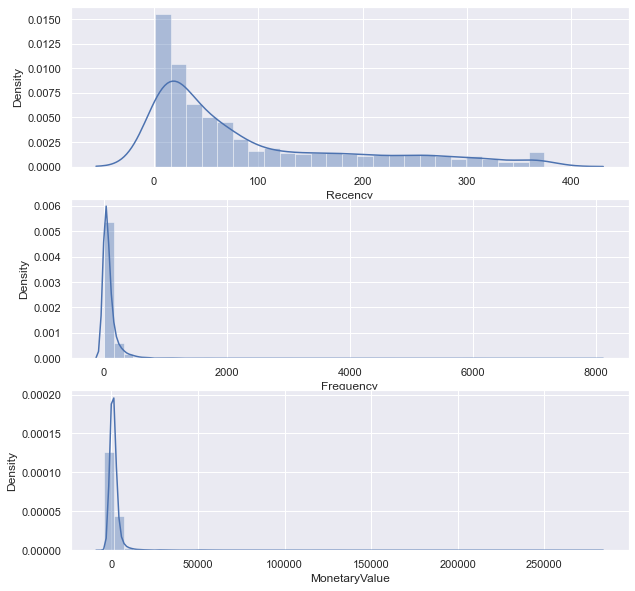

In [115]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1); sns.distplot(datamart['Recency'])

plt.subplot(3, 1, 2); sns.distplot(datamart['Frequency'])

plt.subplot(3, 1, 3); sns.distplot(datamart['MonetaryValue'])

plt.show()

## Data Transformations for Skewness
The easiest way to unskew the data is applying logarithmic transformation but it only works for positive values. There are other approaches like Box-Cox transformation but for sake of simplicity, logarithmic transformation is used here.

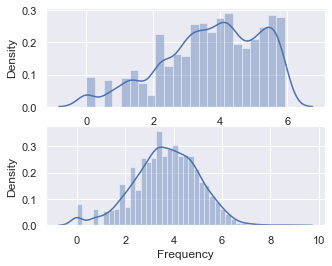

In [116]:
plt.figure(figsize=(5, 4))

recency_log = np.log(datamart['Recency'])
frequency_log = np.log(datamart['Frequency'])

plt.subplot(2, 1, 1); sns.distplot(recency_log)
plt.subplot(2, 1, 2); sns.distplot(frequency_log)

plt.show()

In [117]:
datamart['MonetaryValue'].min()

-4287.63

## Dealing with Negative Numbers
1. Adding a constant before log transformation:

This method is to add a constant number for each variables. The choice of value is arbitrary but the best practice is to add the absolute value of the lowest negative value to each observation and then a small constant like 1, to force the variables to be strictly positive

2. Cube root transformation:

This method is calculating a cube root works well in some cases. The fortunate thing about customer behavior data is that it almost always positive, so we don't have to worry about this.

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

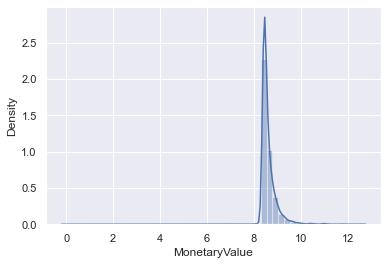

In [118]:
# Adding the absolute value of lowest negative number (4287.63) and a small constant (1). Total is 4288.63
datamart['MonetaryValue'] += 4288.63 
monetary_value_log = np.log(datamart.MonetaryValue)
sns.distplot(monetary_value_log)

## Step_2 Centering and Scaling Data
Method-1: Subtract mean and divide by standard deviation manually
Method-2: Use a scaler from scikit-learn (returns numpy.ndarray object)

In [119]:
datamart_rfm.MonetaryValue.min()


-4287.63

In [120]:
datamart_rfm['MonetaryValue'] += 4288.63 
datamart_log = np.log(datamart_rfm)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)
datamart_normalized = scaler.transform(datamart_log)


In [121]:
print('mean: ', datamart_normalized.mean(axis=0).round(2)) 
print('std: ', datamart_normalized.std(axis=0).round(2))

mean:  [-0.  0. -0.]
std:  [1. 1. 1.]


In [122]:
# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

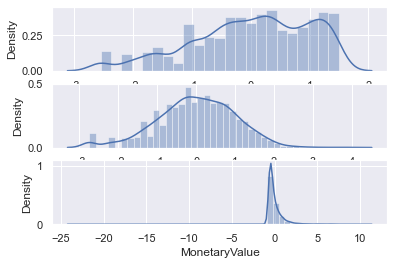

In [123]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()

## Run Kmeans

In [124]:
## Run KMeans
# n_clusters = 3
# Import KMeans 
from sklearn.cluster import KMeans


In [125]:
# Initialize KMeans
kmeans = KMeans(n_clusters = 3, random_state = 1)

# Fit k-means clustering on the normalized data set
kmeans.fit (datamart_normalized)

# Extract cluster labels
cluster_labels_3 = kmeans.labels_

In [126]:
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels_3)

# Group the data by cluster
grouped_3 = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped_3.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
  }).round(1)# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels_3)

# Group the data by cluster
grouped_3 = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped_3.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
  }).round(1)

Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          33.5      97.5        5643.9  1915  10807992.7
1         163.4      22.0        4717.3  2037   9609083.7
2          13.1     417.2       15792.6   420   6632879.8

In [127]:
datamart_rfm_k3.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,4288.63,1
12347.0,2,182,8598.63,2
12348.0,75,31,6085.87,1
12349.0,19,73,6046.18,0
12350.0,310,17,4623.03,1


In [128]:
k=3
n_clusters=k
kmeans = KMeans(n_clusters, random_state=1)
kmeans.fit(datamart_normalized)
kmeans.inertia_

6058.079135654354

## Choosing the number of clusters
# There are three Methods:

1. Visual methods - elbow criterion:

Plot the number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster center

Identify an "elbow" in the plot

Elbow - a point representing an "optimal" number of clusters

2. Mathematical methods - silhouette coefficient:

3. Experimentation and interpretation (analyzing segments):

Build clustering at and around elbow solution
Analyze their properties - average RFM values
Compare against each other and choose one which makes most business sense
## Visual methods - Elbow Method:

In [129]:
# Fit KMeans and calculate SSE for each *k*
sse={}

while k < 11:
    n_clusters=k
    kmeans = KMeans(n_clusters, random_state=1)
    kmeans.fit (datamart_normalized)
    sse[k] = kmeans.inertia_  
    k+=1 # sum of squared distances to closest cluster center

In [130]:
sse

{3: 6058.079135654354,
 4: 5057.972552272206,
 5: 4268.762908591025,
 6: 3722.932094222734,
 7: 3187.2096217186363,
 8: 2758.955244508756,
 9: 2503.2979796661334,
 10: 2279.4720708863288}

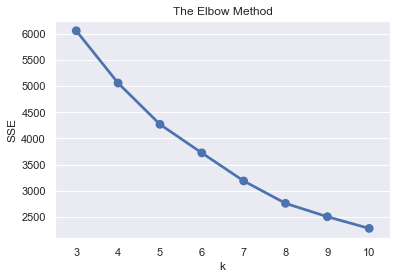

In [131]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

Conclusion: When applying elbow criterion method. It is always best to choose the point on elbow, or the next point. We can use this as a guide but test multiple solutions. According to the graph above, 2 cluster seems the most optimal one. We will try 2 and 3 clusters.Conclusion: When applying elbow criterion method. It is always best to choose the point on elbow, or the next point. We can use this as a guide but test multiple solutions. According to the graph above, 2 cluster seems the most optimal one. We will try 2 and 3 clusters.

## Profile and interpret segments
# Approaches to build customer personas

1. Summary statistics for each cluster e.g. average RFM values

2. Snake plots (from market research)

3. Relative importance of cluster attributes compared to population

In [132]:
# Initialize KMeans
kmeans = KMeans(n_clusters = 2, random_state = 1)

# Fit k-means clustering on the normalized data set
kmeans.fit (datamart_normalized)
# Extract cluster labels
cluster_labels_2 = kmeans.labels_
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k2 = datamart_rfm.assign(Cluster=cluster_labels_2)

# Group the data by cluster
grouped_2 = datamart_rfm_k2.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped_2.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count','sum']
  }).round(1)

Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          22.4     191.3        8322.1  1728  14380643.9
1         137.6      28.9        4791.7  2644  12669312.3

## Summary statistics for 2 clusters

In [133]:
# Calculate average RFM values and segment sizes per cluster value- For 2 Clusters
grouped_2.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
  }).round(1)

Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          22.4     191.3        8322.1  1728  14380643.9
1         137.6      28.9        4791.7  2644  12669312.3

In [134]:
# Initialize KMeans
kmeans = KMeans(n_clusters = 3, random_state = 1)

# Fit k-means clustering on the normalized data set
kmeans.fit (datamart_normalized)

# Extract cluster labels
cluster_labels_3 = kmeans.labels_
# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels_3)

# Group the data by cluster
grouped_3 = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped_3.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
  }).round(1)


Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          33.5      97.5        5643.9  1915  10807992.7
1         163.4      22.0        4717.3  2037   9609083.7
2          13.1     417.2       15792.6   420   6632879.8

In [135]:
# Calculate average RFM values and segment sizes per cluster value- For 2 Clusters
grouped_2.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
  }).round(1)

Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          22.4     191.3        8322.1  1728  14380643.9
1         137.6      28.9        4791.7  2644  12669312.3

In [136]:
# Calculate average RFM values and segment sizes per cluster value
grouped_3.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count', 'sum']
  }).round(1)

Recency Frequency MonetaryValue                  
           mean      mean          mean count         sum
Cluster                                                  
0          33.5      97.5        5643.9  1915  10807992.7
1         163.4      22.0        4717.3  2037   9609083.7
2          13.1     417.2       15792.6   420   6632879.8

## Conclusion:

We just compare these two clusters. As we can see fromm the above tables, there are some inherent differences between 2-cluster and 3-cluster solutions. While 2-cluster solution is simplier, 3-cluster gives more insight. But 2-cluster solution is more in line with our RFM analysis solution (in Gold segment, we have 1.690 customers, in 2-cluster segment, we have 1.728 customers. And these segments' total monetary valeu are almost the same, which is 14 million $)

## 2. Snake plots
We use snake plots to understand and compare segments. Snake plots are a market research technique plotting different segments and their RFM Values on a line chart. But we need to normalize the data (center and scale) so that the values would be comparable. Finally we plot each cluster's average values on a line plot.

First, we create a DataFrame from our normalized NumPy array.

In [137]:
# Transform datamart_normalized as DataFrame and add a Cluster column

# We will pass it to the pandas DataFrame function, and use the index and columns from the original datamart_rfm

datamart_normalized = pd.DataFrame(datamart_normalized, 
                                   index=datamart_rfm.index, 
                                   columns=datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']

# For easier plotting, we will melt the data into a long form format so RFM values and metric names are stored in 1 column each.

In [138]:
# We basically melt the three RFM columns and create one called attribute.
datamart_melt = pd.melt(datamart_normalized.reset_index(), 
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                    var_name='Attribute', 
                    value_name='Value')

In [139]:
datamart_melt.head(15)

,CustomerID,Cluster,Attribute,Value
0,12346.0,1,Recency,1.402917
1,12347.0,2,Recency,-2.075135
2,12348.0,1,Recency,0.399593
3,12349.0,0,Recency,-0.537936
4,12350.0,1,Recency,1.368554
5,12352.0,0,Recency,-0.101567
6,12353.0,1,Recency,1.082832
7,12354.0,1,Recency,1.170653
8,12355.0,1,Recency,1.115508
9,12356.0,0,Recency,-0.407482


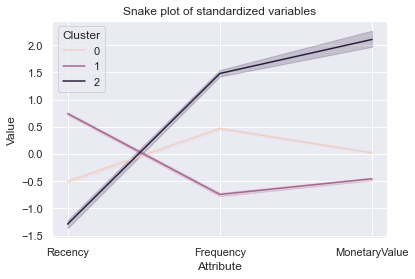

In [140]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=datamart_melt)
plt.show()

## 3. Relative importance of cluster attributes compared to population
In this technique, we want our segments to differ from the overall population, and have distinctive properties of their own. We can use this technique identify relative importance of each attribute.

 First, we calculate the average RFM values for each cluster. Then, we do the same for the total population.(Calculate average values of population)
 Finally, we calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average) from the result.
 The result is a relative importance score for each RFM value of the segments.
 The further a ratio is from 0, the more important that attribute is for defining a specific cluster compared to the population average.

In [141]:
# Calculate the average RFM values for each cluster.

cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean()
cluster_avg

,Recency,Frequency,MonetaryValue
Cluster,,,
0,33.498695,97.530026,5643.860407
1,163.357879,22.017673,4717.272293
2,13.142857,417.164286,15792.571024


In [142]:
# Calculate average values of population

population_avg = datamart_rfm.mean()
population_avg 

Recency            92.047118
Frequency          93.053294
MonetaryValue    6187.089700
dtype: float64

In [143]:
# Calculate importance score by dividing them and subtracting 1 

relative_imp = cluster_avg / population_avg - 1 #ensures 0 is returned when cluster average equals population average

In [144]:
# The further a ratio is from 0, the more important that attribute is for defining a specific cluster compared to the population average.

relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.64,0.05,-0.09
1,0.77,-0.76,-0.24
2,-0.86,3.48,1.55


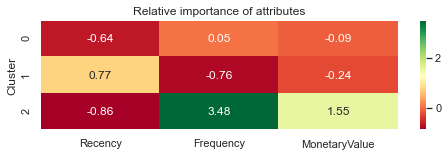

In [145]:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

# Summary for Customer Segmentation
Key steps of the segmentation project
Gather data - updated data with an additional variable,
Pre-process the data,
Explore the data and decide on the number of clusters,
Run k-means clustering,
Analyze and visualize results.
